# Simulation of bivariate regression with a discontinuity

#### TODO list
1. Simulate discontinuity frontier (instead of threshold)
2. Estimate Gaussian process mixture (pre- and post- frontier), estimate single Gaussian process.
3. Grid search or Monte Carlo integration of GP hyperparameters to compute marginal likelihoods for both models, to obtain a Bayes factor for the discontinuity.
4. Extend to learn threshold/frontier probabilistically a priori.

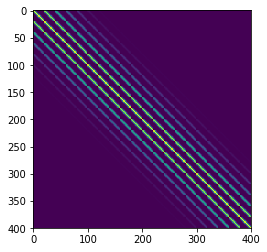

In [103]:
# Python import nightmare
import sys
sys.path.extend(['C:\\Users\\u341138\\Dropbox\\Projects\\GPRDD'])
from importlib import reload
import utils
reload(utils)

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt4Agg', warn=False)
%matplotlib inline

# assuming standardized predictors

gridrange = np.arange(0, 1, 0.05)
U, V = np.meshgrid(gridrange, gridrange)

x = np.transpose(np.array([U.flatten(), V.flatten()]))

ns = x.shape[0]

k = lambda x, y, alpha: np.exp(-np.dot(x-y, x-y) / (2*alpha**2))

alpha = 0.1

C = np.zeros((ns, ns))

for i in range(ns):
    for j in range(ns):
        C[i,j] = k(x[i,:], x[j,:], alpha)
        
plt.imshow(C)
plt.pause(1)

In [106]:
A, S, _ = np.linalg.svd(C, full_matrices = True)
z = np.random.normal(loc = 0.0, scale=1.0, size=ns)
T = np.matmul(A, np.diag(np.sqrt(S)))
sample = np.matmul(T, z)
sample = np.reshape(sample, (len(gridrange), len(gridrange)))

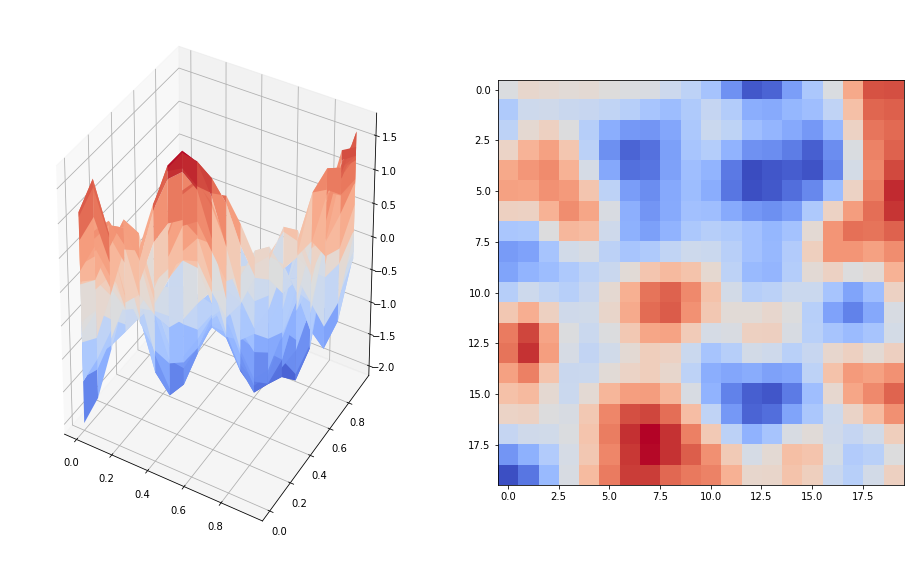

In [109]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(gridrange, gridrange, sample, cmap=cm.coolwarm)
ax = fig.add_subplot(122)
ax.imshow(sample, cmap=cm.coolwarm)
plt.pause(1)